# Handwritten Digit Classification

## Importing Libraries

In [57]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Importing training data

In [8]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [9]:
len(x_train)

60000

In [10]:
len(x_test)

10000

In [12]:
x_train[0].shape

(28, 28)

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

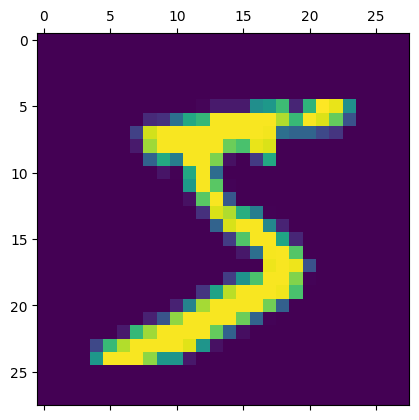

In [33]:
  plt.matshow(x_train[0])

In [34]:
y_train[0]

np.uint8(5)

In [29]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)


## Training example 1

In [40]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3767 - loss: 9.5852 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3591 - loss: 6.0506
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3432 - loss: 5.7693
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3405 - loss: 5.5542
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3312 - loss: 5.2504


In [41]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3417 - loss: 5.1146


[5.114556789398193, 0.3416999876499176]

## Training Example 2

In [47]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation = 'sigmoid')
]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_normalized,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.4702
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9151 - loss: 0.3039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9209 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9236 - loss: 0.2730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9258 - loss: 0.2665


In [48]:
model.evaluate(x_test_normalized,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.2700


[0.26997318863868713, 0.9265999794006348]

In [49]:
y_predicted = model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


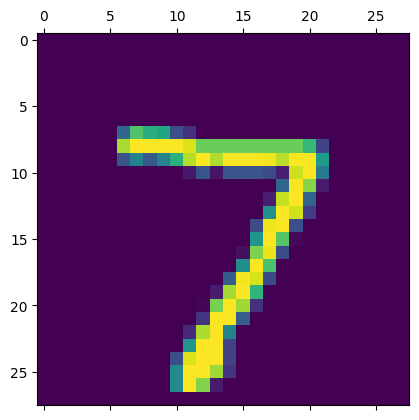

In [50]:
plt.matshow(x_test[0])

In [52]:
np.argmax(y_predicted[0])

np.int64(7)

In [53]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [55]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)

<Axes: >

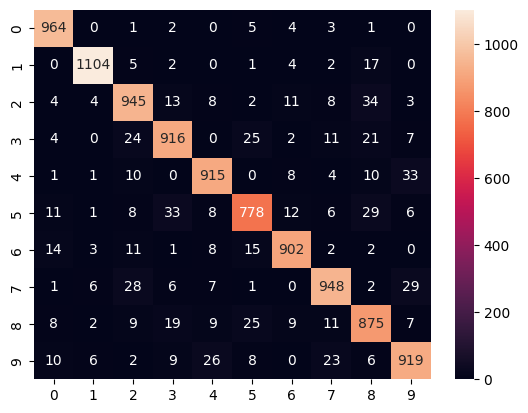

In [59]:
sns.heatmap(cm,annot=True,fmt='d')

## Training Example 3

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_normalized,y_train,epochs=5)


C:\Users\Z30\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9247 - loss: 0.2692
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9636 - loss: 0.1224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9803 - loss: 0.0655
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0519


In [63]:
model.evaluate(x_test_normalized,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0852


[0.08517922461032867, 0.9750000238418579]

In [61]:
y_predicted = model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

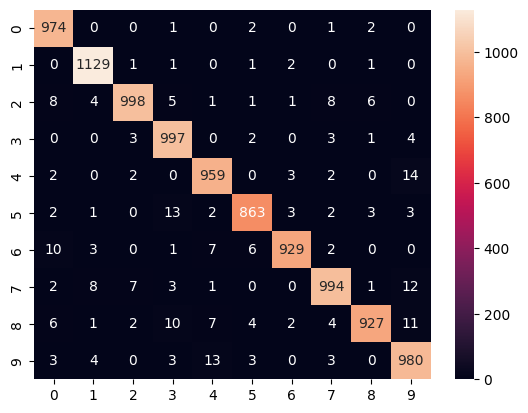

In [62]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)
sns.heatmap(cm,annot=True,fmt='d')

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
]
)

model.compile(
    optimizer = 'adam',
    loss = 'mean_absolute_error',
    metrics = ['accuracy']
)

model.fit(x_train_normalized,y_train,epochs=5)


Epoch 1/5


ValueError: Dimensions must be equal, but are 32 and 10 for '{{node compile_loss/mean_absolute_error/sub}} = Sub[T=DT_FLOAT](compile_loss/mean_absolute_error/Cast, sequential_6_1/dense_9_1/Sigmoid)' with input shapes: [32], [32,10].